In [39]:
import pandas as pd
from sklearn import *
import numpy as np

In [2]:
sheets = pd.read_excel("/data/CCPP/Folds5x2_pp.xlsx", sheet_name=None)

In [7]:
len(sheets.values())

5

In [10]:
df = pd.concat(sheets.values())

In [11]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47840 entries, 0 to 9567
Data columns (total 5 columns):
AT    47840 non-null float64
V     47840 non-null float64
AP    47840 non-null float64
RH    47840 non-null float64
PE    47840 non-null float64
dtypes: float64(5)
memory usage: 2.2 MB


In [16]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [17]:
df.columns = ['AT', 'V', 'AP', 'RH', 'EP']

In [18]:
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [20]:
import seaborn as sns

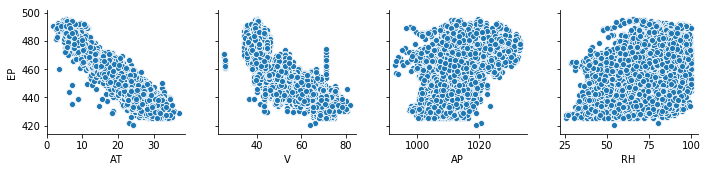

In [24]:
sns.pairplot(df, x_vars= ['AT', 'V', 'AP', 'RH'],  y_vars=["EP"])

In [43]:
target = "EP"
y = df[target]
X = df.drop(columns=[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

error_test = y_test_pred - y_test

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)


test r2:  0.9284503317586209
train r2:  0.928796240630408
test rmse:  4.5690823234830775
train rmse:  4.552038643335909


In [49]:
est = pipe.steps[-1][-1]

In [30]:
import matplotlib.pyplot as plt

In [50]:
pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})

,feature,coefficient
0,AT,-14.735987
1,V,-2.963096
2,AP,0.383009
3,RH,-2.308446


Text(0.5, 1.0, 'Residual plot')

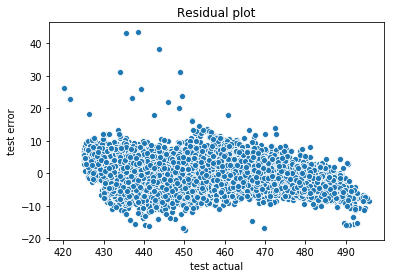

In [32]:
sns.scatterplot(y_test, error_test)
plt.xlabel("test actual")
plt.ylabel("test error")
plt.title("Residual plot")

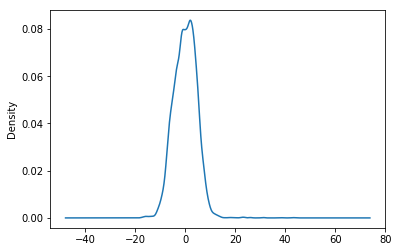

In [37]:
pd.Series(error_test).plot.kde()

test r2:  0.9369182172745872
train r2:  0.9371560210167448
test rmse:  0.009399971258663405
train rmse:  0.009366727360638764


Text(0.5, 1.0, 'Residual plot')

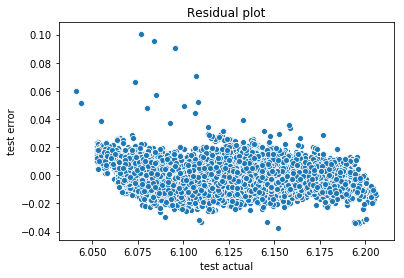

In [42]:
target = "EP"
y = np.log(df[target])
X = df.drop(columns=[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                                              , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

error_test = y_test_pred - y_test

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

sns.scatterplot(y_test, error_test)
plt.xlabel("test actual")
plt.ylabel("test error")
plt.title("Residual plot")